In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as dt
import math
import statistics
import pandas as pd
import importlib as il

In [20]:
#My personal machine learning functions
import randfor_functions as rf

In [88]:
il.reload(rf)

<module 'randfor_functions' from 'C:\\Users\\marcu\\Dropbox\\ultimate_challenge\\randfor_functions.py'>

In [47]:
with open('ultimate_data_challenge.json') as filename:
    users = json.load(filename)

In [48]:
print(len(users))
print(users[0].keys())

50000
dict_keys(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])


In [49]:
#50000 users

In [50]:
#First: convert to dataframe.

In [51]:
users = pd.DataFrame(users)

In [52]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [53]:
#Converting string data to categorical

In [54]:
users.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [55]:
users['Kings_Landing'] = [city == "King's Landing" for city in users['city']]
users['Astapor'] = [city == 'Astapor' for city in users['city']]
users['Winterfell'] = [city == 'Winterfell' for city in users['city']]
users.drop(axis = 1, labels = 'city', inplace = True)

In [56]:
#All users signed up in January, so the only relevant part here is the day
int(users.signup_date[0][8:])

25

In [57]:
signup_date = []
for index, row in users.iterrows():
    signup_date.append(int(row.signup_date[8:]))
users['signup_date'] = signup_date

In [58]:
users.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [59]:
users.phone.fillna('None', inplace = True)
users['iPhone'] = [phone == 'iPhone' for phone in users['phone']]
users['Android'] = [phone == 'Android' for phone in users['phone']]
users['None'] = [phone == 'None' for phone in users['phone']]
users.drop(axis = 1, labels = 'phone', inplace = True)

In [60]:
max(users.last_trip_date)

'2014-07-01'

In [61]:
#last trip date: July 01. According to the documentation, a user is active if their last
#trip date is at or after June 01. Generating that data.

In [62]:
active_user = []
date_format = '%Y-%m-%d'
cutoff_date = dt.datetime.strptime('2014-06-01', date_format)
for index, row in users.iterrows():
    if dt.datetime.strptime(row.last_trip_date, date_format) >= cutoff_date:
        active_user.append(True)
    else:
        active_user.append(False)
users.drop(axis=1, labels = 'last_trip_date', inplace = True)

In [77]:
activecount = 0
for u in active_user:
    if u:
        activecount += 1
print('percent users retained:', activecount/len(active_user))

percent users retained: 0.37608


In [ ]:
#Retaining just over a third of all January signups.

In [ ]:
#Verify data integrity

In [67]:
for col in users.columns:
    if users[col].hasnans:
        print(col)

avg_rating_of_driver
avg_rating_by_driver


In [ ]:
#Need to fill in the nans. Filling with mean of dataset.
#The rating being zero may be more indicative than I'm giving it credit for, but for now
#we'll just run it like this.

In [69]:
rating_of = np.mean(users.avg_rating_of_driver)
rating_by = np.mean(users.avg_rating_by_driver)

In [70]:
users.avg_rating_of_driver.fillna(rating_of, inplace = True)
users.avg_rating_by_driver.fillna(rating_by, inplace = True)

In [71]:
for col in users.columns:
    if users[col].hasnans:
        print(col)

In [72]:
#All set. Let's see what we get.

In [73]:
#Running a random forest machine learning model to classify users as being active or not.
rf.randfor_class_talk(users, active_user, 1000, 20, None, 50)

train score: 0.8296266666666666
test score: 0.78376
f1 score 0.691965811965812
confusion_matrix:
[[6761 1046]
 [1657 3036]]
precision score: 0.7437530622243999
recall score: 0.6469209460899211
columns: 15
rows: 50000
total data: 750000
feature importances:
avg_rating_by_driver: 0.2973701470218051
Kings_Landing: 0.12736731698941833
weekday_pct: 0.10986919808273043
avg_dist: 0.10726318462085413
surge_pct: 0.061713970905838036
ultimate_black_user: 0.050311997417447726
Android: 0.0475179539164546
trips_in_first_30_days: 0.047353862164022854
signup_date: 0.04723743577955062
avg_rating_of_driver: 0.033589474104200656
avg_surge: 0.02996800769083417
iPhone: 0.019377347631673487
Astapor: 0.01436640280395194
Winterfell: 0.005950526459010577
None: 0.0007431744122071016
elapsed time: 0:01:25.904438


In [ ]:
#Takeaways of the first model:
#Slight overfit, may want to reduce depth/increase min sample size
#Some columns are not very relevant, such as if they had an iphone, signup date
#Some of this data is correlated: Surge pct vs avg surge, iphone vs android, etc

In [ ]:
#Rerunning with some adjustments, trying to remove correlation

In [78]:
small_dataset = users[['avg_rating_by_driver', 'Kings_Landing', 'weekday_pct', 'avg_dist', 'surge_pct',\
                      'ultimate_black_user', 'trips_in_first_30_days', 'avg_rating_of_driver']]

In [79]:
rf.randfor_class_talk(small_dataset, active_user, 5000, 15, None, 200)

train score: 0.7825333333333333
test score: 0.77384
f1 score 0.6789324247586598
confusion_matrix:
[[6684 1165]
 [1662 2989]]
precision score: 0.7195474241694753
recall score: 0.6426574930122554
columns: 8
rows: 50000
total data: 400000
feature importances:
avg_rating_by_driver: 0.39577149047637555
Kings_Landing: 0.1816751226701275
surge_pct: 0.12042329109409487
weekday_pct: 0.11281691711245904
ultimate_black_user: 0.06611835054936459
avg_dist: 0.06061025278729491
trips_in_first_30_days: 0.043623808965990385
avg_rating_of_driver: 0.01896076634429312
elapsed time: 0:04:32.049441


In [80]:
#Significant improvement over previous model. Most relevant predictor of being active is far
#and away average rating by driver, which makes sense - that's probably the closest we're getting
#to an employee satisfaction metric. After that, the geographical column, surge_pct, weekday_pct.
#Currently classifying 77% correctly. Almost no overfit.
#Precision better than recall: Most of the people we predict will stay stay, but we don't predict
#everyone who will stay.
#Removing rating_of, at <.02 importance, to save time.

In [ ]:
#Next: calculate optimum depth.

In [81]:
small_dataset = users[['avg_rating_by_driver', 'Kings_Landing', 'weekday_pct', 'avg_dist', 'surge_pct',\
                      'ultimate_black_user', 'trips_in_first_30_days']]

In [89]:
train_list, test_list, f_list = rf.rand_find_depth(1000, small_dataset, active_user, 20, 200)

done with test  0
done with test  1
done with test  2
done with test  3
done with test  4
done with test  5
done with test  6
done with test  7
done with test  8
done with test  9
done with test  10
done with test  11
done with test  12
done with test  13
done with test  14
done with test  15
done with test  16
done with test  17
done with test  18
done with test  19


Text(0, 0.5, 'Model score')

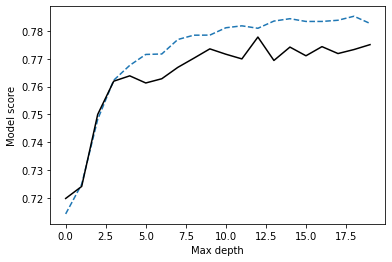

In [93]:
plt.plot(range(20), train_list, ls = '--')
plt.plot(range(20), test_list, c = 'black')
plt.xlabel('Max depth')
plt.ylabel('Model score')

In [ ]:
#We start to see overfit at around max depth 4. We see accuracy begin to fall off at around
#the same depth. I don't see signifcant benefit to max depth higher than 10.
#Arguably, we could go lower, but this isn't too computationally expensive.

In [94]:
#I've chosen to use a random forest model because it's a straightforward machine learning
#model that performs well with most datasets. Naive Bayes is another option, and if we
#wanted to get especially serious we could try something like a neural network, but
#for a dataset this size, this should work fine.

In [ ]:
#This indicates that long-term rider retention is most heavily influenced by how the riders
#rate their trips. Improving that metric might involve improved employee training and support
#Better routing to take traffic and roadwork into account, or other metrics.
#It also appears that the rider being located in Kings Landing is predictive - this city is
#doing something different than Astapor and Winterfell. We should examine this data specifically
#and see if we can determine what that is.
#After that, surge and weekday use are slightly predictive. We may wish to incentivize surge use
#or set up notifications to play at specific times. 